In [12]:
from graph_tool.all import *

In [13]:
g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

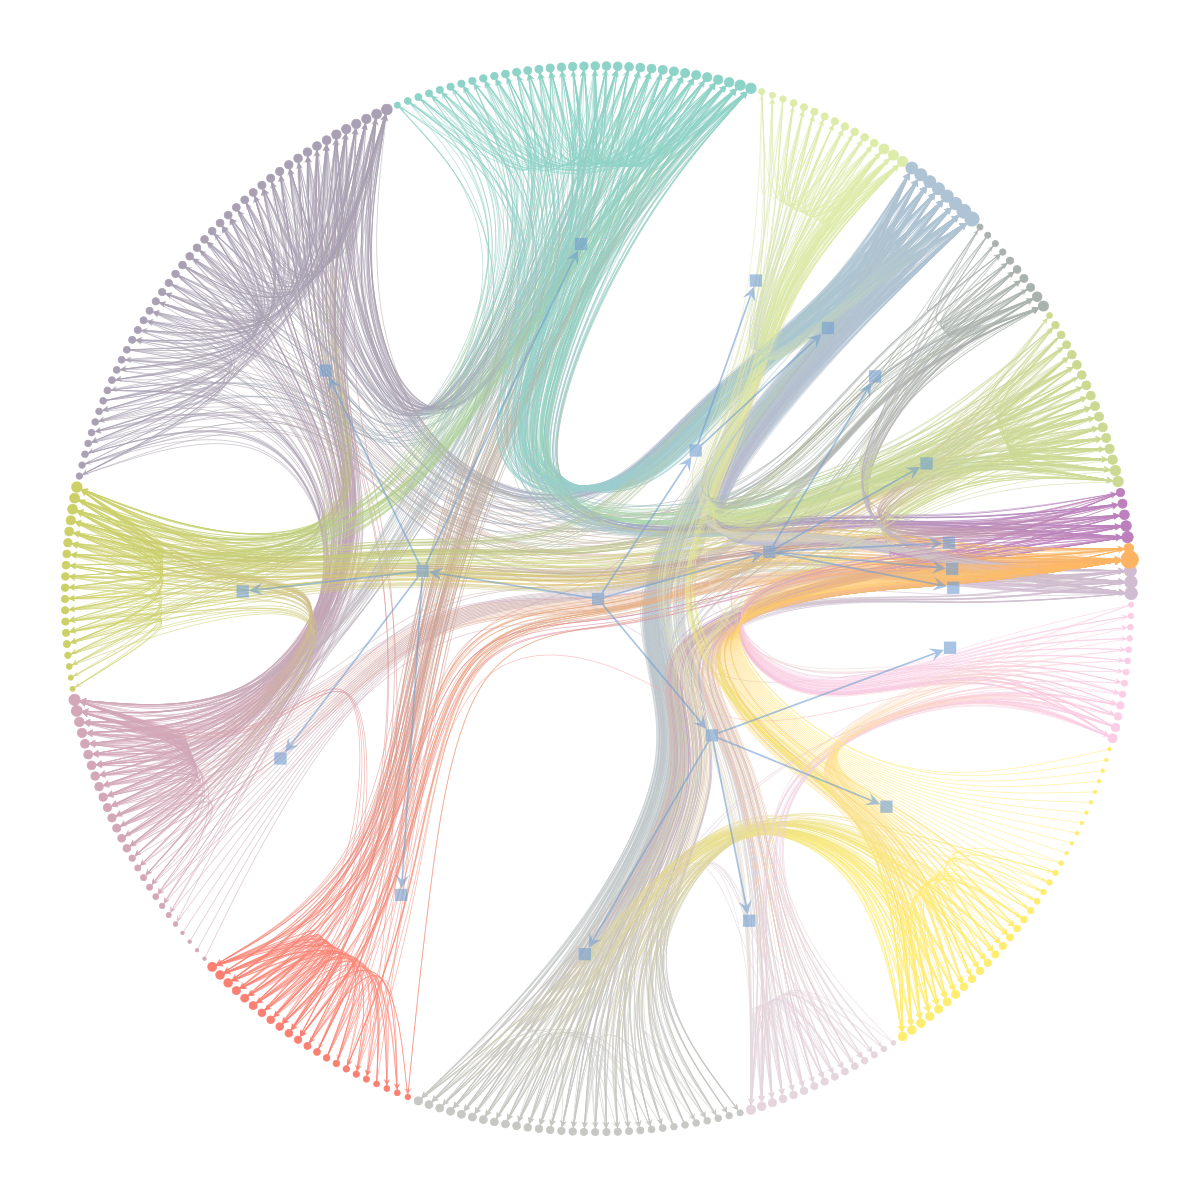

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x291640220, at 0x2916a3c40>,
 <Graph object, directed, with 318 vertices and 317 edges, at 0x29168aac0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x29168aac0, at 0x2916400a0>)

In [14]:
state.draw()

In [3]:
from __future__ import division, absolute_import, print_function
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *
from numpy.random import *
seed(42)
import time
from graph_tool.all import *

In [5]:
g = Graph()

v_age = g.new_vertex_property("int")
e_age = g.new_edge_property("int")

N = 200000

v = g.add_vertex()
v_age[v] = 0

vlist = [v]

for i in range(1, N):
    v = g.add_vertex()
    v_age[v] = i

    i = randint(0, len(vlist))
    target = vlist[i]

    e = g.add_edge(v, target)
    e_age[e] = i

    vlist.append(target)
    vlist.append(v)

vertex: 14985 in-degree: 0 out-degree: 1 age: 14985
vertex: 4783 in-degree: 2 out-degree: 1 age: 4783
vertex: 34 in-degree: 74 out-degree: 1 age: 34
vertex: 7 in-degree: 163 out-degree: 1 age: 7
vertex: 3 in-degree: 295 out-degree: 1 age: 3
vertex: 1 in-degree: 747 out-degree: 1 age: 1
vertex: 0 in-degree: 291 out-degree: 0 age: 0
Nowhere else to go... We found the main hub!


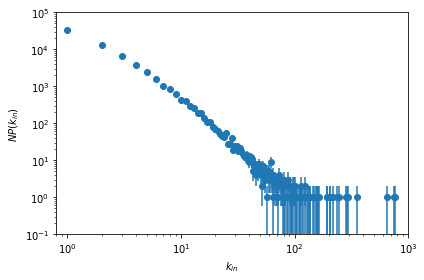

In [6]:
v = g.vertex(randint(0, g.num_vertices()))
while True:
    print("vertex:", int(v), "in-degree:", v.in_degree(), "out-degree:",
          v.out_degree(), "age:", v_age[v])

    if v.out_degree() == 0:
        print("Nowhere else to go... We found the main hub!")
        break

    n_list = []
    for w in v.out_neighbors():
        n_list.append(w)
    v = n_list[randint(0, len(n_list))]

g.vertex_properties["age"] = v_age
g.edge_properties["age"] = e_age
g.save("price.xml.gz")

in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e5)
gca().set_xlim(0.8, 1e3)
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()
savefig("price-deg-dist.pdf")
savefig("price-deg-dist.svg")

In [7]:
g = load_graph("price.xml.gz")
age = g.vertex_properties["age"]

In [8]:
start = time.time()

pos = sfdp_layout(g)

elasped_time = time.time() - start
print("elasped_time: {0}".format(elasped_time) + "[sec]")

elasped_time: 1122.5428330898285[sec]


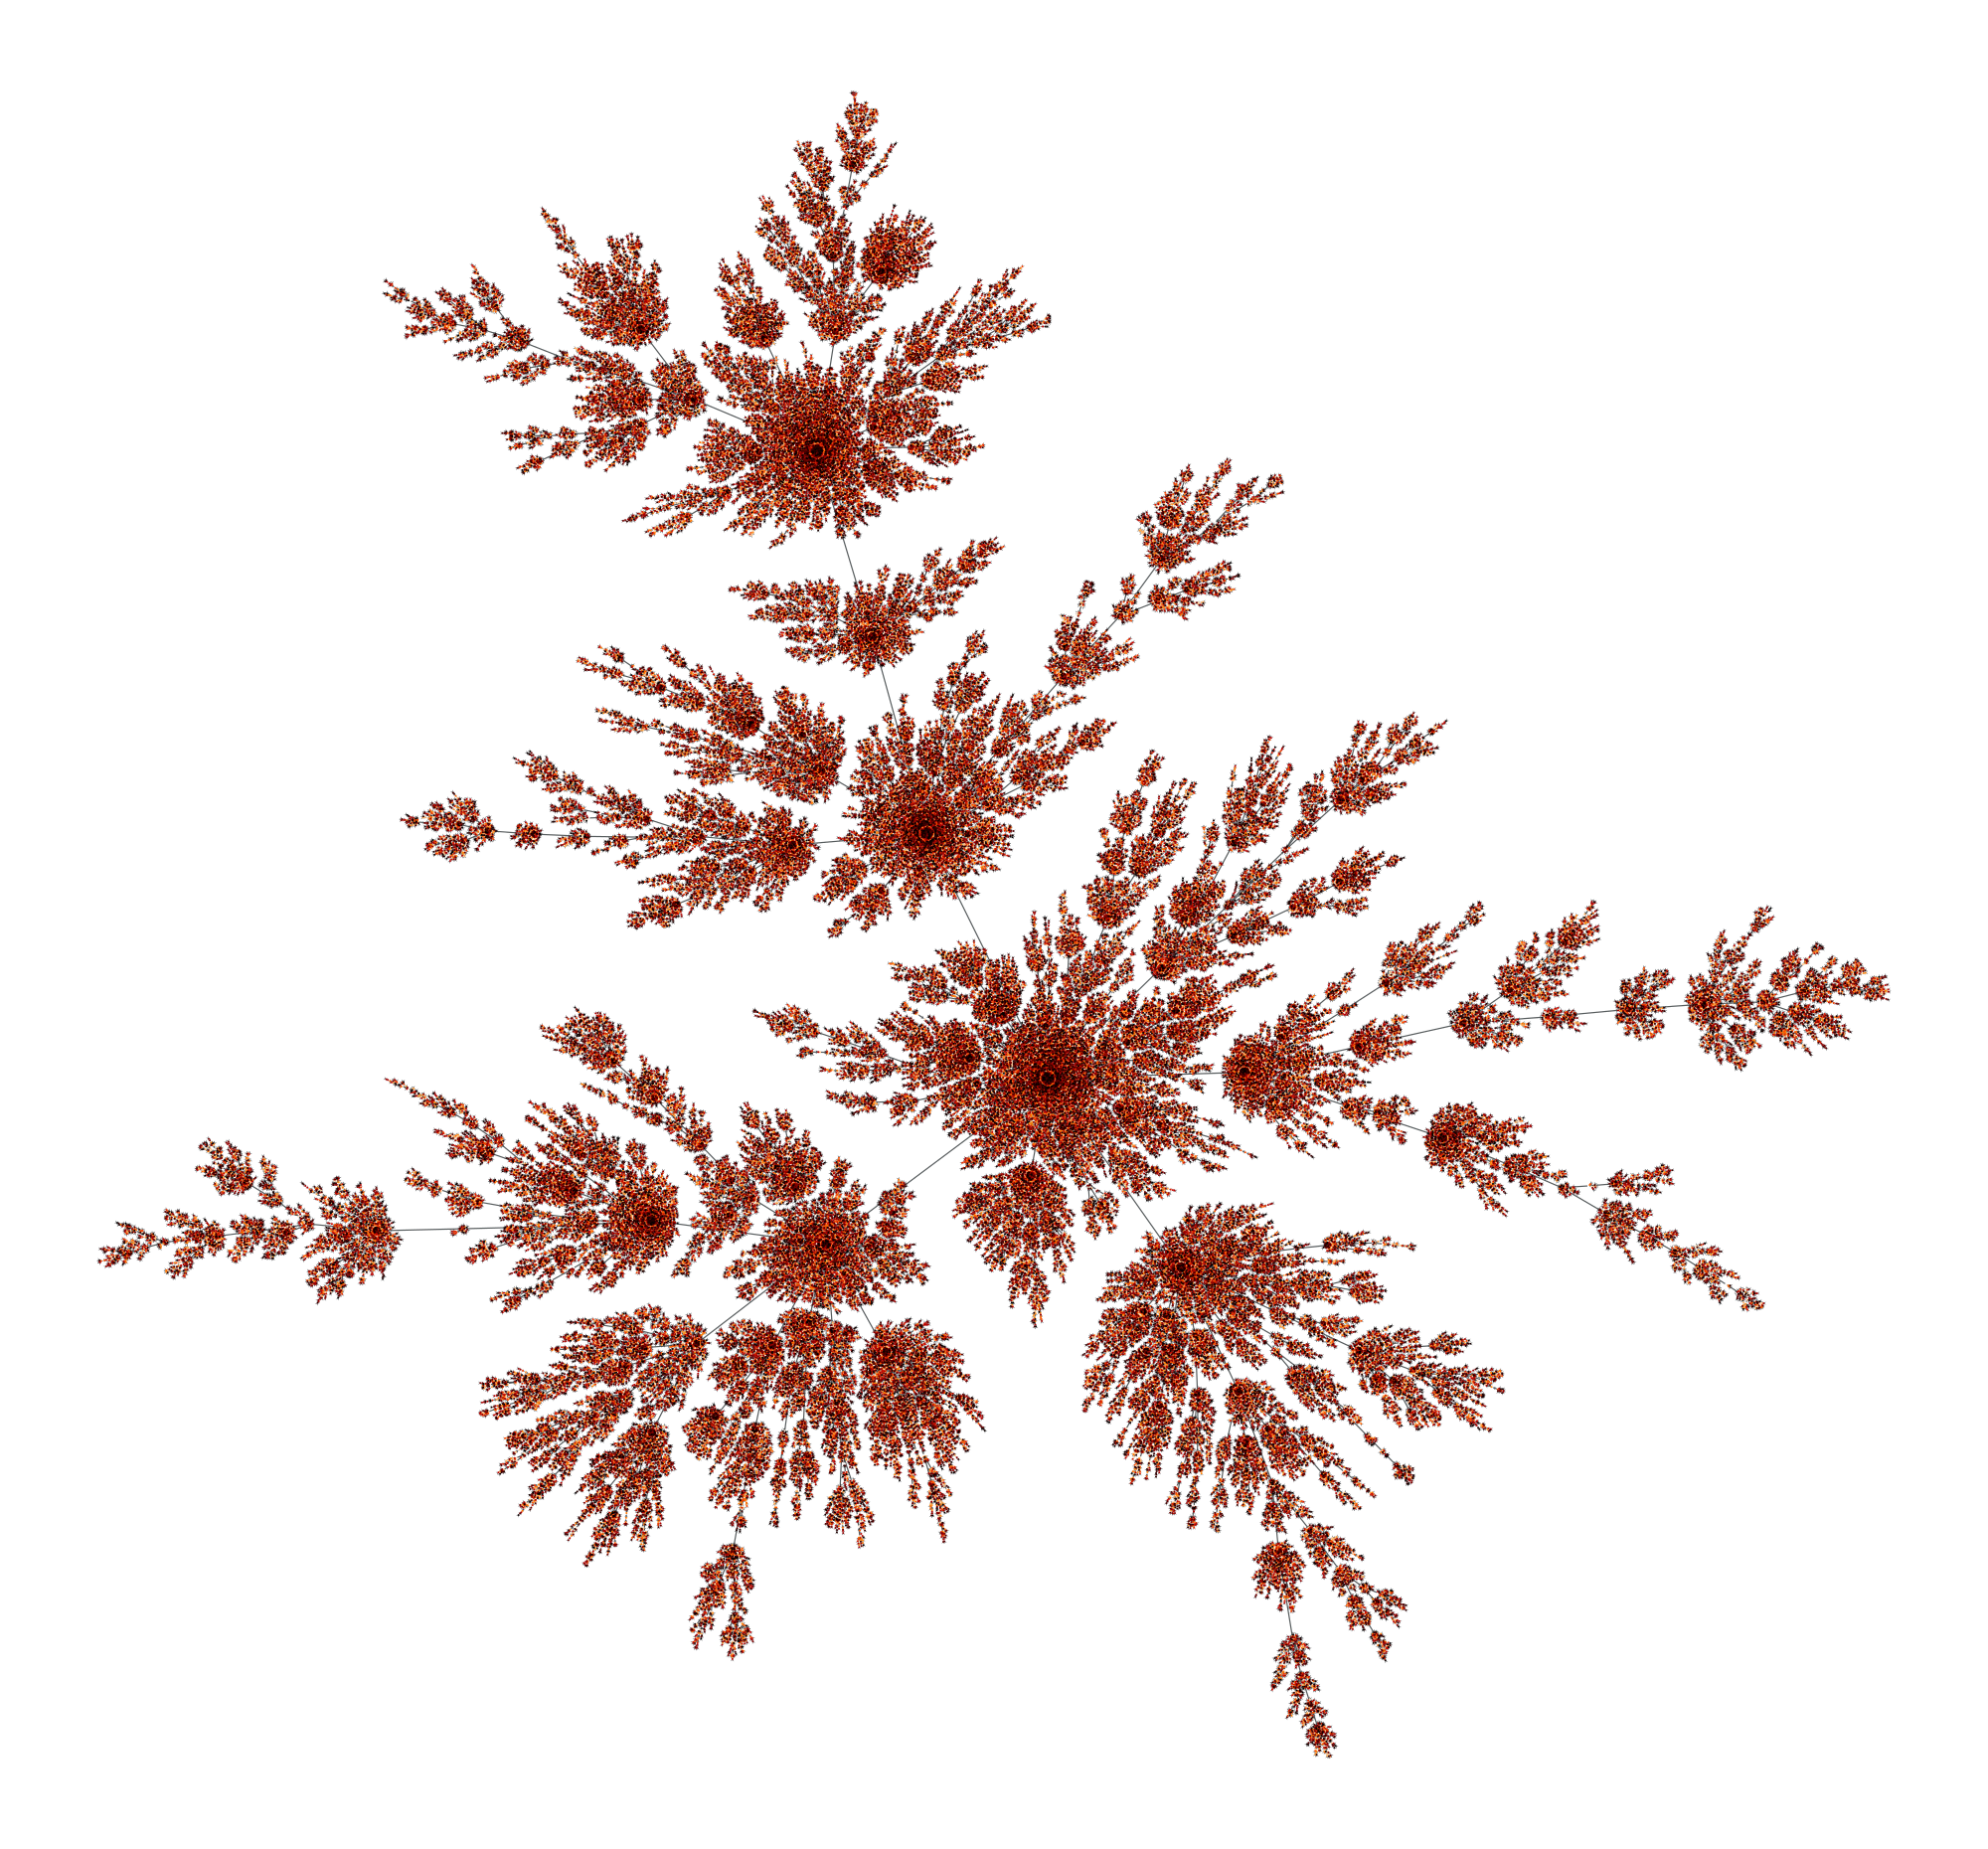

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2916781f0, at 0x15a084fa0>

In [11]:
graph_draw(g, pos, output_size=(1000, 1000), vertex_color=[1,0,0,0],
           vertex_fill_color=age, vertex_size=1, edge_pen_width=0.6,
           vcmap=matplotlib.cm.gist_heat_r)